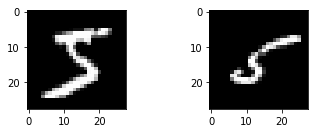

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 2 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[11], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
#converting image pixels to a vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1 so that it converges faster
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# define base model
def mlp_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# build the model
model = mlp_model()
# Fitting model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2795 - acc: 0.9207 - val_loss: 0.1420 - val_acc: 0.9567
Epoch 2/10
 - 7s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0920 - val_acc: 0.9714
Epoch 3/10
 - 7s - loss: 0.0714 - acc: 0.9798 - val_loss: 0.0787 - val_acc: 0.9771
Epoch 4/10
 - 7s - loss: 0.0502 - acc: 0.9858 - val_loss: 0.0748 - val_acc: 0.9761
Epoch 5/10
 - 7s - loss: 0.0372 - acc: 0.9892 - val_loss: 0.0677 - val_acc: 0.9788
Epoch 6/10
 - 7s - loss: 0.0266 - acc: 0.9927 - val_loss: 0.0622 - val_acc: 0.9807
Epoch 7/10
 - 8s - loss: 0.0207 - acc: 0.9948 - val_loss: 0.0604 - val_acc: 0.9818
Epoch 8/10
 - 7s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0625 - val_acc: 0.9799
Epoch 9/10
 - 7s - loss: 0.0106 - acc: 0.9979 - val_loss: 0.0572 - val_acc: 0.9822
Epoch 10/10
 - 7s - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0583 - val_acc: 0.9811
Baseline Error: 1.89%
